In [1]:
from src.models.high_level_model import HighLevelModel
from src.data.multi_output_dataset import MultiOutputDataModule

import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt

In [2]:
GENDER_LABELS = [
    "Male",
    "Female"
]

RACE_LABELS = [
    "White",
    "Black",
    "Asian",
    "Indian",
    "Other"
]

UTKFACE_CLASSES = [len(GENDER_LABELS), len(RACE_LABELS)]

In [3]:
model = HighLevelModel.load_from_checkpoint(
    "models/utkface-high-level-model.ckpt",
    task_num_classes=UTKFACE_CLASSES,
    map_location="cpu",
)
model = model.eval()

data = MultiOutputDataModule(
    root_dir="data/UTKFace", batch_size=64, num_workers=0, task_num_classes=UTKFACE_CLASSES
)
data.setup()

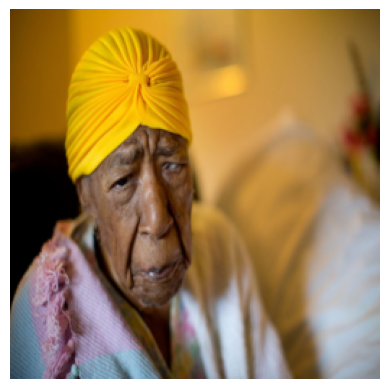

Predicted gender: Male - Ground Truth gender: Female
Predicted race: Black - Ground Truth race: Black



In [4]:
for batch in data.val_dataloader():
    # Get the inputs
    x, y = batch[0], batch[1]

    # Forward pass
    with torch.no_grad():
        y_pred = model(x)

    # Plot the image
    plt.imshow(x[0].permute(1, 2, 0))
    plt.axis("off")
    plt.show()

    # Print the predicted and ground truth labels
    print(
        f"Predicted gender: {GENDER_LABELS[torch.argmax(y_pred[0][0]).item()]} - Ground Truth gender: {GENDER_LABELS[y[0][0].item()]}"
    )
    print(
        f"Predicted race: {RACE_LABELS[torch.argmax(y_pred[1][0]).item()]} - Ground Truth race: {RACE_LABELS[y[0][0].item()]}"
    )
    print()
    break

In [5]:
trainer = pl.Trainer(accelerator="gpu")
trainer.test(model, data)

You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/masters-thesis/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/masters-thesis/venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'test_dataloader' does not have many workers which 

Testing DataLoader 0: 100%|██████████| 57/57 [04:55<00:00,  0.19it/s]Task 0 Accuracy: 0.89
Task 0 F1 Score: 0.89
Task 0 Confusion Matrix:
[[1765  129]
 [ 261 1461]]
Task 1 Accuracy: 0.72
Task 1 F1 Score: 0.70
Task 1 Confusion Matrix:
[[1369   57   54   64   16]
 [  94  512   15   57    9]
 [ 104   23  303   47   14]
 [ 104   76   40  388    7]
 [  86   45   31   66   35]]
Overall Accuracy (Low-level): 0.65
Mean Task Accuracy (High-level): 0.81
Testing DataLoader 0: 100%|██████████| 57/57 [04:55<00:00,  0.19it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric         ┃        DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ test_accuracy (High-level) │     0.8065541982650757     │
│ test_accuracy (Low-level)  │     0.6457411646842957     │
│    test_task_0_accuracy    │     0.8921459913253784     │
│    test_task_0_conf_acc    │     0.8921459913253784     │
│       test_task_0_f1       │     0.8918126821517944     │
│    test_task_1_accuracy    │     0.720962405204773      │
│    test_task_1_conf_acc    │     0.720962405204773      │
│       test_task_1_f1       │     0.7046677470207214     │
└────────────────────────────┴────────────────────────────┘

[{'test_task_0_accuracy': 0.8921459913253784,
  'test_task_0_f1': 0.8918126821517944,
  'test_task_0_conf_acc': 0.8921459913253784,
  'test_task_1_accuracy': 0.720962405204773,
  'test_task_1_f1': 0.7046677470207214,
  'test_task_1_conf_acc': 0.720962405204773,
  'test_accuracy (Low-level)': 0.6457411646842957,
  'test_accuracy (High-level)': 0.8065541982650757}]